In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv('/kaggle/input/bfs-casa/reduced_transaction.csv')
df = pd.read_csv('/kaggle/input/reduced-casa-txn/reduced_balanced_merged_transaction.csv')
df.head()

,Unnamed: 0,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Birth Year,Birth Month,Gender,Latitude,Longitude,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes,Hazel Robinson,53,1966,11,Female,34.15,-117.76,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,1,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes,Hazel Robinson,53,1966,11,Female,34.15,-117.76,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
2,2,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,Yes,Hazel Robinson,53,1966,11,Female,34.15,-117.76,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
3,3,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,Yes,Hazel Robinson,53,1966,11,Female,34.15,-117.76,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
4,4,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,Yes,Hazel Robinson,53,1966,11,Female,34.15,-117.76,$59696,$127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No


In [171]:
pd.set_option('display.max_columns', None)
df=df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59514 entries, 0 to 59513
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User                    59514 non-null  int64  
 1   Card                    59514 non-null  int64  
 2   Year                    59514 non-null  int64  
 3   Month                   59514 non-null  int64  
 4   Day                     59514 non-null  int64  
 5   Time                    59514 non-null  object 
 6   Amount                  59514 non-null  object 
 7   Use Chip                59514 non-null  object 
 8   Merchant Name           59514 non-null  int64  
 9   Merchant City           59514 non-null  object 
 10  Merchant State          38265 non-null  object 
 11  Zip                     31607 non-null  float64
 12  MCC                     59514 non-null  int64  
 13  Errors?                 1753 non-null   object 
 14  Is Fraud?               59514 non-null

In [172]:
df.nunique()

User                       1343
Card                          9
Year                         28
Month                        12
Day                          31
Time                       1440
Amount                    19744
Use Chip                      3
Merchant Name              7627
Merchant City              4066
Merchant State               94
Zip                        7266
MCC                         109
Errors?                      16
Is Fraud?                     2
Person                     1338
Current Age                  76
Birth Year                   75
Birth Month                  12
Gender                        2
Latitude                    780
Longitude                   915
Yearly Income - Person     1322
Total Debt                 1262
FICO Score                  288
Num Credit Cards              9
Card Brand                    4
Card Type                     3
Card Number                2752
Expires                     214
CVV                         933
Has Chip

In [173]:
# removing the $ sign from the Amount column
columns=['Yearly Income - Person','Credit Limit','Amount', 'Total Debt', 'Credit Limit']
print(df[columns])
for col in columns:
    df[col]=df[col].replace(r'[$]', '', regex=True)
print(df[columns])

      Yearly Income - Person Credit Limit   Amount Total Debt Credit Limit
0                     $59696       $24295  $287.13    $127613       $24295
1                     $59696       $24295    $2.41    $127613       $24295
2                     $59696       $24295   $50.81    $127613       $24295
3                     $59696       $24295  $248.36    $127613       $24295
4                     $59696       $24295  $473.00    $127613       $24295
...                      ...          ...      ...        ...          ...
59509                 $30942        $5700    $2.87     $71066        $5700
59510                 $30942        $5700    $3.43     $71066        $5700
59511                 $30942        $5700    $2.22     $71066        $5700
59512                 $30942        $5700   $10.29     $71066        $5700
59513                 $30942        $5700   $23.50     $71066        $5700

[59514 rows x 5 columns]
      Yearly Income - Person Credit Limit  Amount Total Debt Credit Limit


In [174]:
# It is observed that for the Online transactions we have missing 'Merchant State' and 'Zip'. 
# So for online transactions 'Merchant State' will be 'online' and 'Zip' will be '0000'


df['Merchant State']=df['Merchant State'].fillna('online')
df['Zip']=df['Zip'].fillna(0000)
df['Errors?']=df['Errors?'].fillna('No Error')

In [175]:
df['Errors?'].value_counts()

Errors?
No Error                                 57761
Insufficient Balance                       683
Bad PIN                                    372
Bad CVV                                    297
Bad Expiration                             130
Technical Glitch                           126
Bad Card Number                            119
Bad PIN,Insufficient Balance                 7
Bad Zipcode                                  5
Bad CVV,Insufficient Balance                 4
Bad Card Number,Insufficient Balance         2
Bad Expiration,Bad CVV                       2
Bad Expiration,Technical Glitch              2
Bad PIN,Technical Glitch                     1
Bad CVV,Technical Glitch                     1
Bad Expiration,Insufficient Balance          1
Insufficient Balance,Technical Glitch        1
Name: count, dtype: int64

In [176]:
df['Errors?']=df['Errors?'].apply(lambda x: 1 if x != 'No Error' else 0)


In [177]:
df['Errors?'].value_counts()

Errors?
0    57761
1     1753
Name: count, dtype: int64

In [178]:
df=df.drop('Person', axis=1)
df=df.drop(['Merchant City','Merchant State'], axis=1)


In [179]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)


In [180]:
df['Use Chip'].value_counts()


Use Chip
Swipe Transaction     25675
Online Transaction    21237
Chip Transaction      12602
Name: count, dtype: int64

In [181]:
# Use Chip Swipe Transaction 311856 => Encoded as 10 Chip Transaction 12725 => Encoded as 231 Online Transaction 608 => Encoded as 3909
# df['Use Chip']=df['Use Chip'].apply(lambda x: 1 if x == 'Swipe Transaction' else (lambda x: 2 if x == 'Chip Transaction' else 3))


In [182]:
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

df['Time']=df['Time'].apply(time_to_minutes)

In [183]:
df.head()


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Zip,MCC,Errors?,Is Fraud?,Current Age,Birth Year,Birth Month,Gender,Latitude,Longitude,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,2015,11,15,775,287.13,Online Transaction,-8194607650924472520,0.0,3001,0,Yes,53,1966,11,0,34.15,-117.76,59696,127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
1,0,0,2015,11,15,799,2.41,Online Transaction,-7759074308363763111,0.0,5651,0,Yes,53,1966,11,0,34.15,-117.76,59696,127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
2,0,0,2015,11,16,581,50.81,Online Transaction,-551332107213382088,0.0,4411,0,Yes,53,1966,11,0,34.15,-117.76,59696,127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
3,0,0,2015,11,16,586,248.36,Online Transaction,4872340518840476610,0.0,5732,0,Yes,53,1966,11,0,34.15,-117.76,59696,127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
4,0,0,2015,11,16,680,473.00,Online Transaction,-8566951830324093739,0.0,3640,0,Yes,53,1966,11,0,34.15,-117.76,59696,127613,787,5,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No


In [184]:
def year_month_to_int(year_month_col):
    year = year_month_col.str.split('/').str[1]
    month = year_month_col.str.split('/').str[0]
    return (year + month).astype(int)

df['Expires']=year_month_to_int(df['Expires'])

In [185]:
df['Acct Open Date']=year_month_to_int(df['Acct Open Date'])


In [186]:
df['Card Brand'].value_counts()


Card Brand
Mastercard    31630
Visa          21652
Amex           4140
Discover       2092
Name: count, dtype: int64

In [187]:
df['Card Type'].value_counts()
df['Is Fraud?'].value_counts()

Is Fraud?
Yes    29757
No     29757
Name: count, dtype: int64

In [188]:
df['Has Chip']=df['Has Chip'].apply(lambda x: 1 if x== 'YES' else 0)
df['Card on Dark Web']=df['Card on Dark Web'].apply(lambda x: 0 if x == 'No' else 1)

In [189]:
# def encode_card_brand(card_brand):
#     card_brand_mapping = {
#         'Mastercard': 1,
#         'Visa': 2,
#         'Amex': 3,
#         'Discover': 4
#     }

#     return card_brand_mapping.get(card_brand, 0)

# df['Card Brand'] = df['Card Brand'].apply(encode_card_brand)

In [190]:
# def encode_use_chip(use_chip):
#     use_chip_mapping = {
#         'Swipe Transaction': 1,
#         'Chip Transaction': 2,
#         'Online Transaction': 3
#     }

#     return use_chip_mapping.get(use_chip, 0)

# df['Use Chip'] = df['Use Chip'].apply(encode_use_chip)

In [191]:
df['Use Chip']

0        Online Transaction
1        Online Transaction
2        Online Transaction
3        Online Transaction
4        Online Transaction
                ...        
59509      Chip Transaction
59510      Chip Transaction
59511     Swipe Transaction
59512     Swipe Transaction
59513     Swipe Transaction
Name: Use Chip, Length: 59514, dtype: object

In [192]:
# def encode_card_type(card_type):
#     card_type_mapping = {
#         'Debit': 1,
#         'Credit': 2,
#         'Debit (Prepaid)': 3
#     }

#     return card_type_mapping.get(card_type, 0)

# df['Card Type'] = df['Card Type'].apply(encode_card_type)

In [193]:
df.dtypes

User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time                        int64
Amount                     object
Use Chip                   object
Merchant Name               int64
Zip                       float64
MCC                         int64
Errors?                     int64
Is Fraud?                  object
Current Age                 int64
Birth Year                  int64
Birth Month                 int64
Gender                      int64
Latitude                  float64
Longitude                 float64
Yearly Income - Person     object
Total Debt                 object
FICO Score                  int64
Num Credit Cards            int64
Card Brand                 object
Card Type                  object
Card Number                 int64
Expires                     int64
CVV                         int64
Has Chip                    int64
Cards Issued  

In [194]:
df[['Amount', 'Is Fraud?','Total Debt', 'Credit Limit']].head()

,Amount,Is Fraud?,Total Debt,Credit Limit
0,287.13,Yes,127613,24295
1,2.41,Yes,127613,24295
2,50.81,Yes,127613,24295
3,248.36,Yes,127613,24295
4,473.00,Yes,127613,24295


In [195]:
df['Is Fraud?']=df['Is Fraud?'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df['Amount'] = df['Amount'].astype(float)
df['Total Debt'] = df['Total Debt'].astype(int)
df['Credit Limit'] = df['Credit Limit'].astype(int)
df['Yearly Income - Person'] = df['Yearly Income - Person'].astype(int)

df.dtypes

User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time                        int64
Amount                    float64
Use Chip                   object
Merchant Name               int64
Zip                       float64
MCC                         int64
Errors?                     int64
Is Fraud?                   int64
Current Age                 int64
Birth Year                  int64
Birth Month                 int64
Gender                      int64
Latitude                  float64
Longitude                 float64
Yearly Income - Person      int64
Total Debt                  int64
FICO Score                  int64
Num Credit Cards            int64
Card Brand                 object
Card Type                  object
Card Number                 int64
Expires                     int64
CVV                         int64
Has Chip                    int64
Cards Issued  

### Gowtham Suggestion

#### Convert card expiry feature to Expiry month and Expiry year

In [196]:
df['Expires'].head()


0    202212
1    202212
2    202212
3    202212
4    202212
Name: Expires, dtype: int64

In [197]:
df['Expires'] = df['Expires'].astype(str)

# Extract 'Expiry Year' and 'Expiry Month' from the 'Expires' column
df['Expiry Year'] = df['Expires'].str[:4]
df['Expiry Month'] = df['Expires'].str[4:]

# Convert them back to integers if needed
df['Expiry Year'] = df['Expiry Year'].astype(int)
df['Expiry Month'] = df['Expiry Month'].astype(int)

In [198]:
df.drop('Expires', axis=1, inplace=True)

In [199]:
df.dtypes

User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time                        int64
Amount                    float64
Use Chip                   object
Merchant Name               int64
Zip                       float64
MCC                         int64
Errors?                     int64
Is Fraud?                   int64
Current Age                 int64
Birth Year                  int64
Birth Month                 int64
Gender                      int64
Latitude                  float64
Longitude                 float64
Yearly Income - Person      int64
Total Debt                  int64
FICO Score                  int64
Num Credit Cards            int64
Card Brand                 object
Card Type                  object
Card Number                 int64
CVV                         int64
Has Chip                    int64
Cards Issued                int64
Credit Limit  

#### Try one-hot encoding (for categorical variables)

In [200]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()
df_encoded.dtypes

User                             int64
Card                             int64
Year                             int64
Month                            int64
Day                              int64
Time                             int64
Amount                         float64
Merchant Name                    int64
Zip                            float64
MCC                              int64
Errors?                          int64
Is Fraud?                        int64
Current Age                      int64
Birth Year                       int64
Birth Month                      int64
Gender                           int64
Latitude                       float64
Longitude                      float64
Yearly Income - Person           int64
Total Debt                       int64
FICO Score                       int64
Num Credit Cards                 int64
Card Number                      int64
CVV                              int64
Has Chip                         int64
Cards Issued             

In [201]:
print(df.describe())


               User          Card          Year         Month           Day  \
count  59514.000000  59514.000000  59514.000000  59514.000000  59514.000000   
mean    1011.044292      1.623282   2011.948852      6.593440     15.760443   
std      559.295582      1.522756      4.825332      3.474749      8.853133   
min        0.000000      0.000000   1993.000000      1.000000      1.000000   
25%      545.000000      0.000000   2008.000000      4.000000      8.000000   
50%     1020.000000      1.000000   2012.000000      7.000000     16.000000   
75%     1487.000000      3.000000   2016.000000     10.000000     23.000000   
max     1997.000000      8.000000   2020.000000     12.000000     31.000000   

               Time        Amount  Merchant Name           Zip           MCC  \
count  59514.000000  59514.000000   5.951400e+04  59514.000000  59514.000000   
mean     754.371728     76.140874  -1.048104e+17  27585.682092   5429.258729   
std      275.388004    156.783125   4.860989e+18

### 3. EDA - Visualization: Corelation heatmap and other piecharts fro better representation of their work


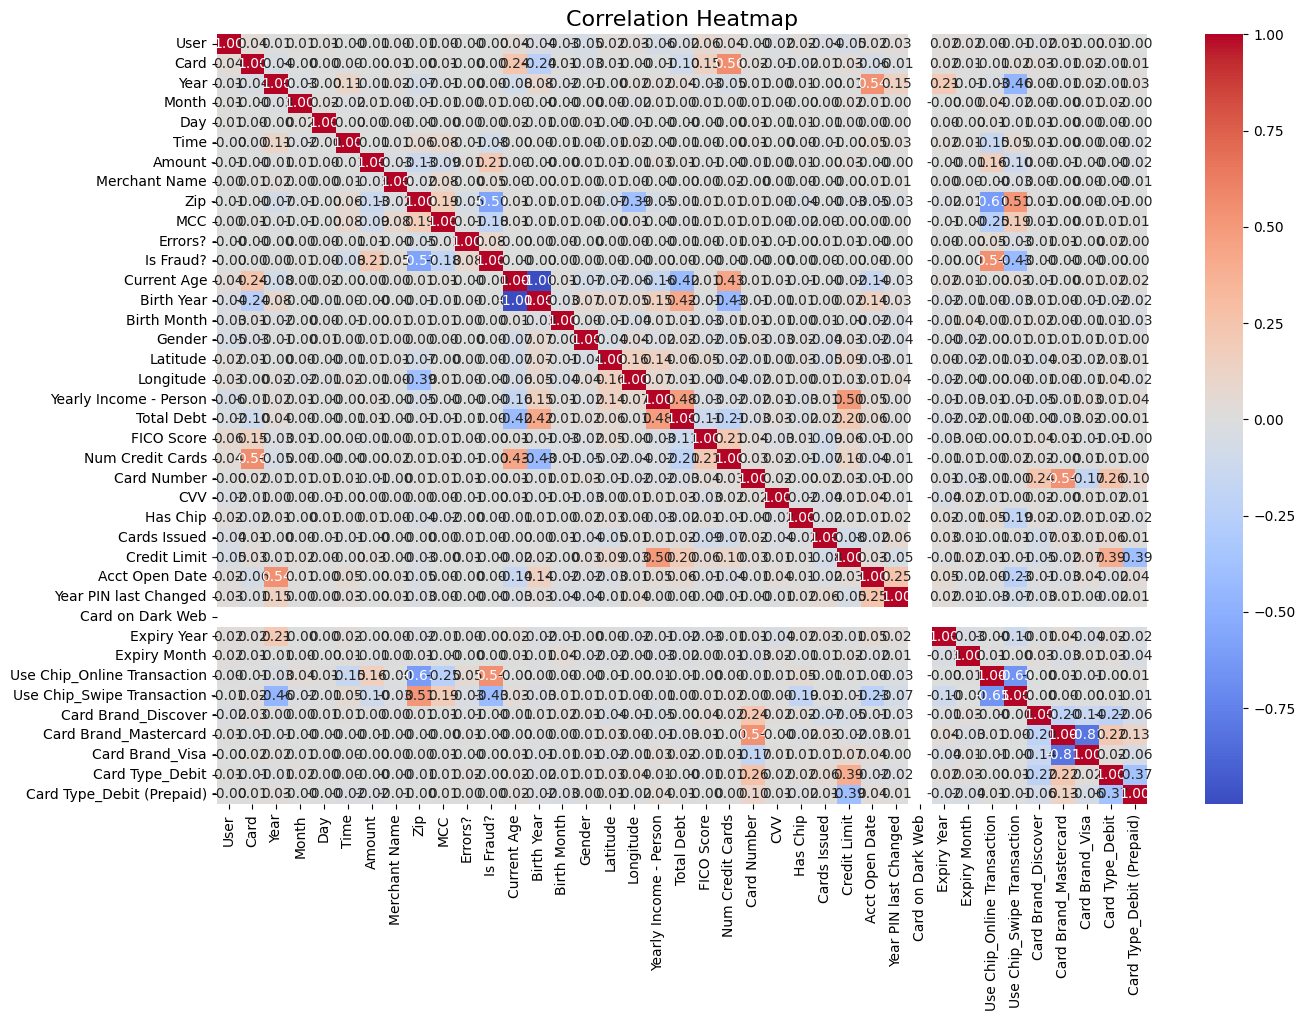

In [202]:
# Compute the correlation matrix
corr = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Display the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


### Univariate Analysis


In [203]:
df['Is Fraud?'].value_counts()

Is Fraud?
1    29757
0    29757
Name: count, dtype: int64

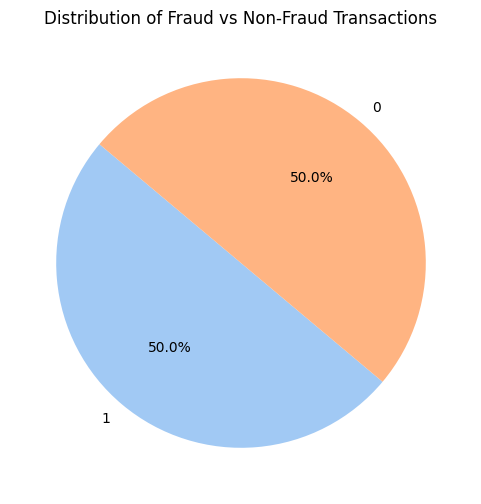

In [204]:
# Distribution of the target variable
fraud_counts = df['Is Fraud?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()


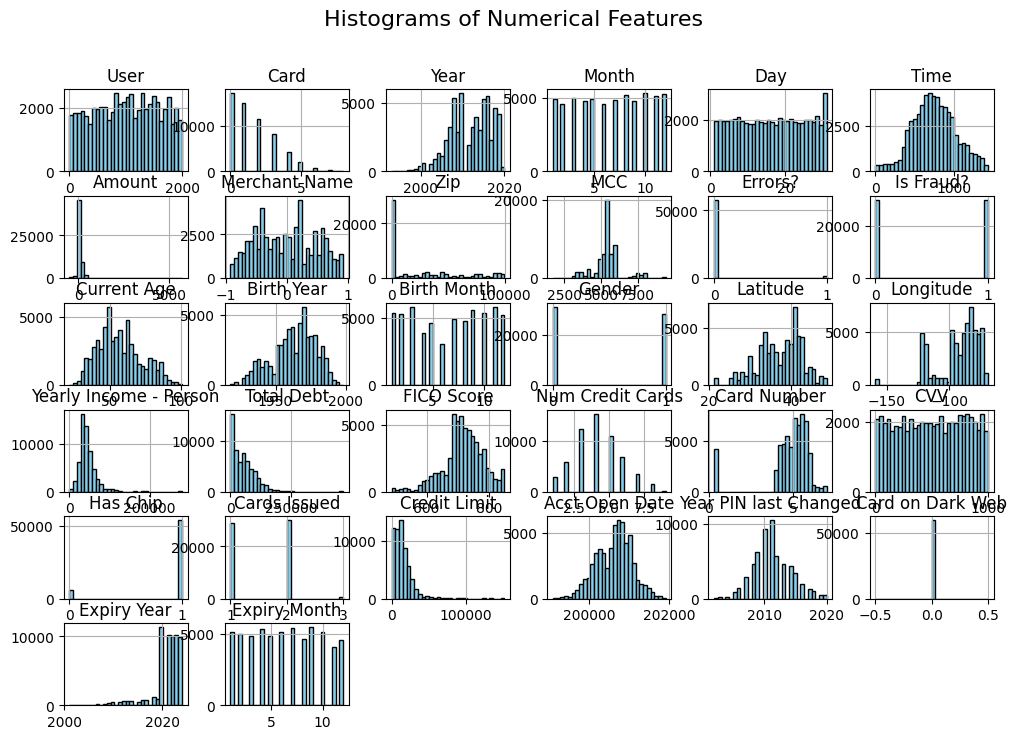

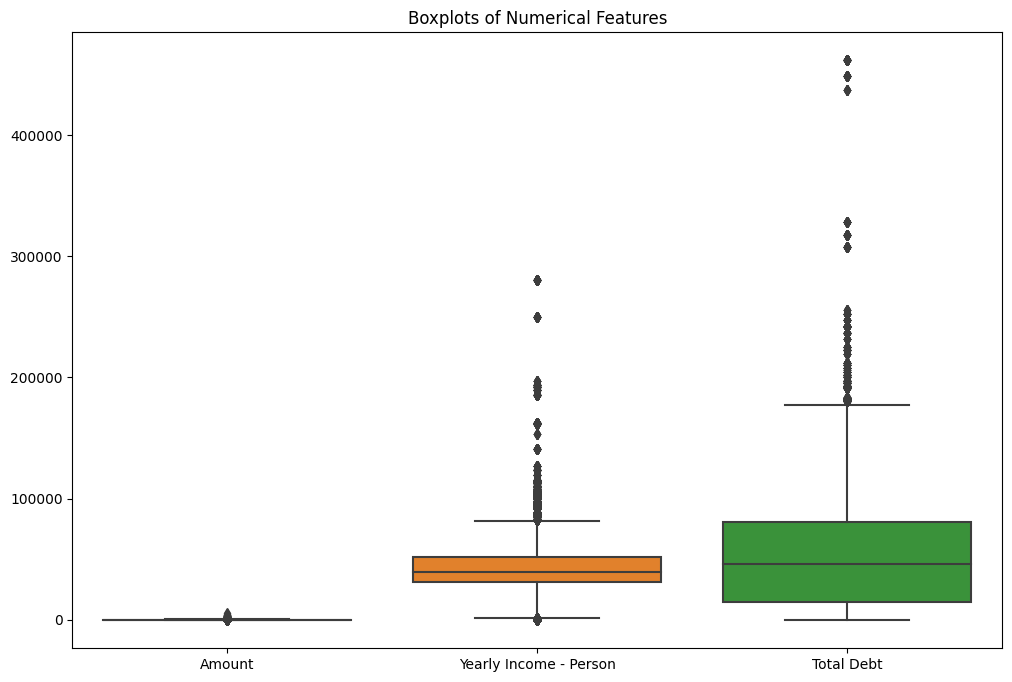

In [205]:
# Histograms for numerical features
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Amount', 'Yearly Income - Person', 'Total Debt']])
plt.title('Boxplots of Numerical Features')
plt.show()


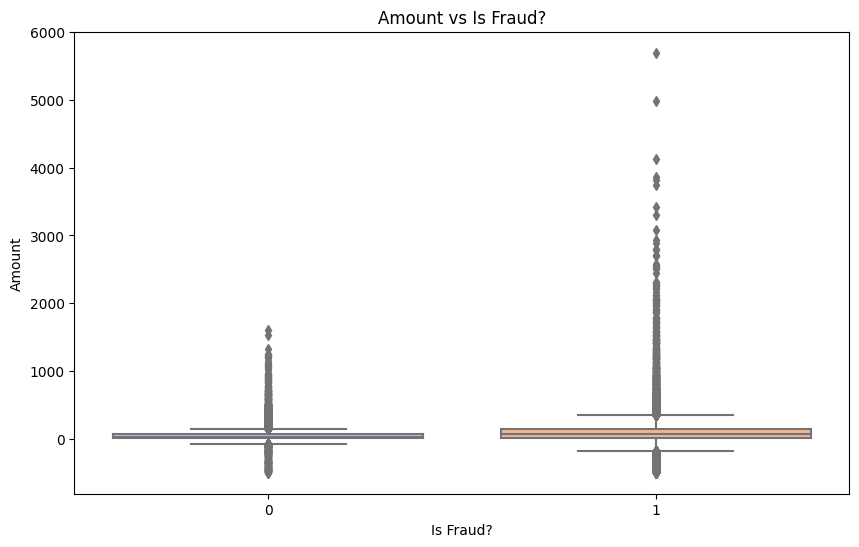

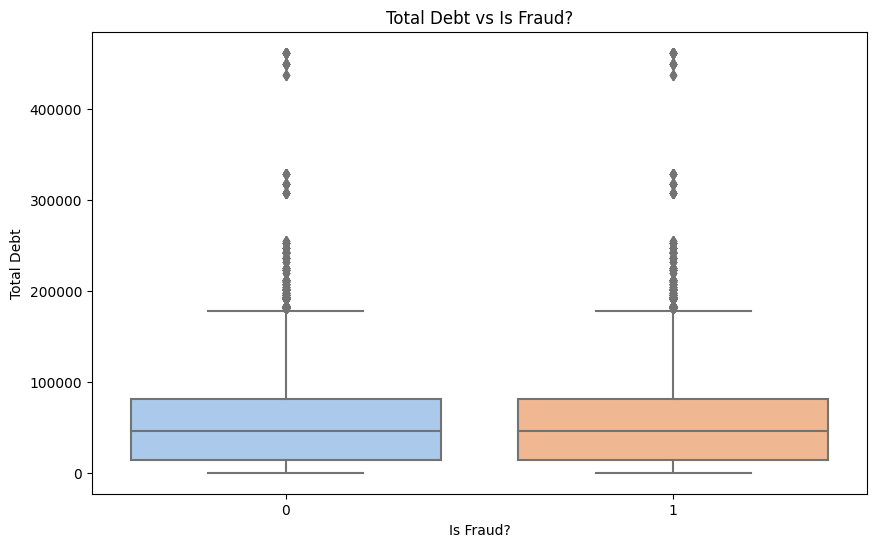

In [206]:
# Boxplot for Amount vs Is Fraud?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraud?', y='Amount', data=df, palette='pastel')
plt.title('Amount vs Is Fraud?')
plt.show()

# Boxplot for Total Debt vs Is Fraud?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraud?', y='Total Debt', data=df, palette='pastel')
plt.title('Total Debt vs Is Fraud?')
plt.show()


### Countplots for Categorical Features


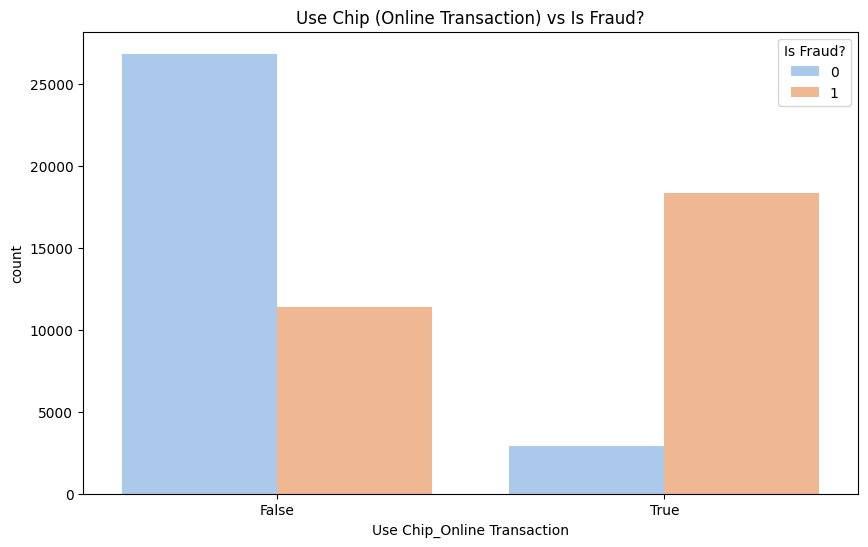

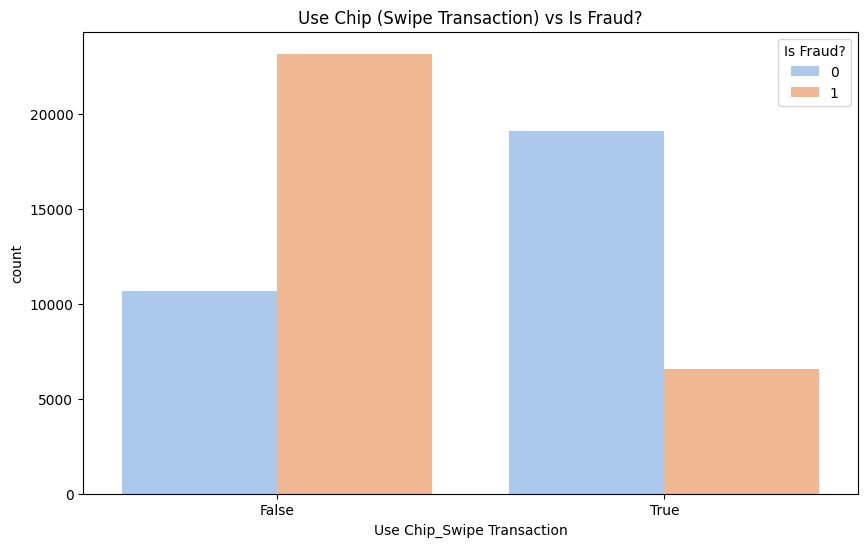

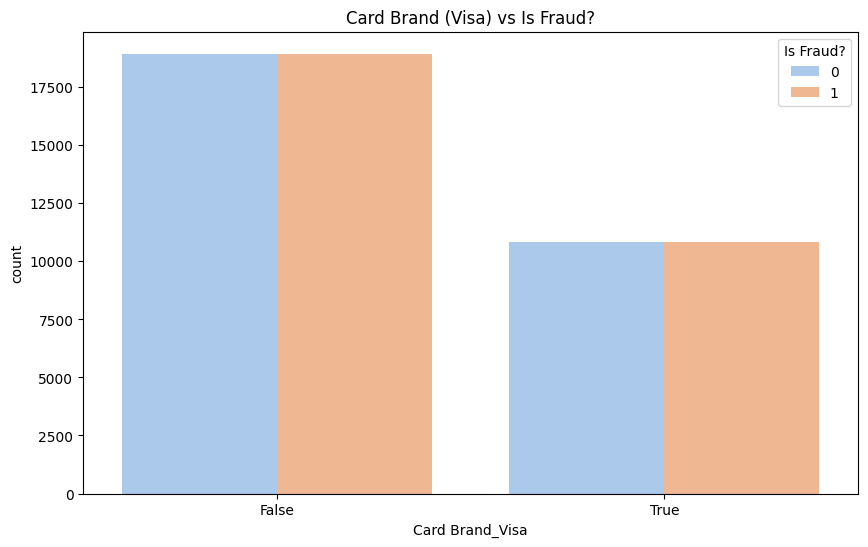

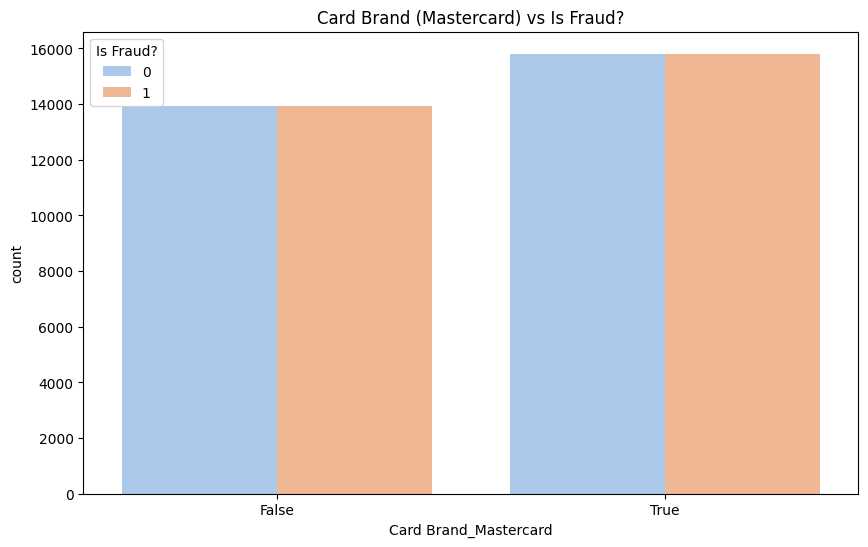

In [207]:
# Countplot for Use Chip (One-hot encoded)
plt.figure(figsize=(10, 6))
sns.countplot(x='Use Chip_Online Transaction', hue='Is Fraud?', data=df_encoded, palette='pastel')
plt.title('Use Chip (Online Transaction) vs Is Fraud?')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Use Chip_Swipe Transaction', hue='Is Fraud?', data=df_encoded, palette='pastel')
plt.title('Use Chip (Swipe Transaction) vs Is Fraud?')
plt.show()

# Countplot for Card Brand (One-hot encoded)
plt.figure(figsize=(10, 6))
sns.countplot(x='Card Brand_Visa', hue='Is Fraud?', data=df_encoded, palette='pastel')
plt.title('Card Brand (Visa) vs Is Fraud?')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Card Brand_Mastercard', hue='Is Fraud?', data=df_encoded, palette='pastel')
plt.title('Card Brand (Mastercard) vs Is Fraud?')
plt.show()




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

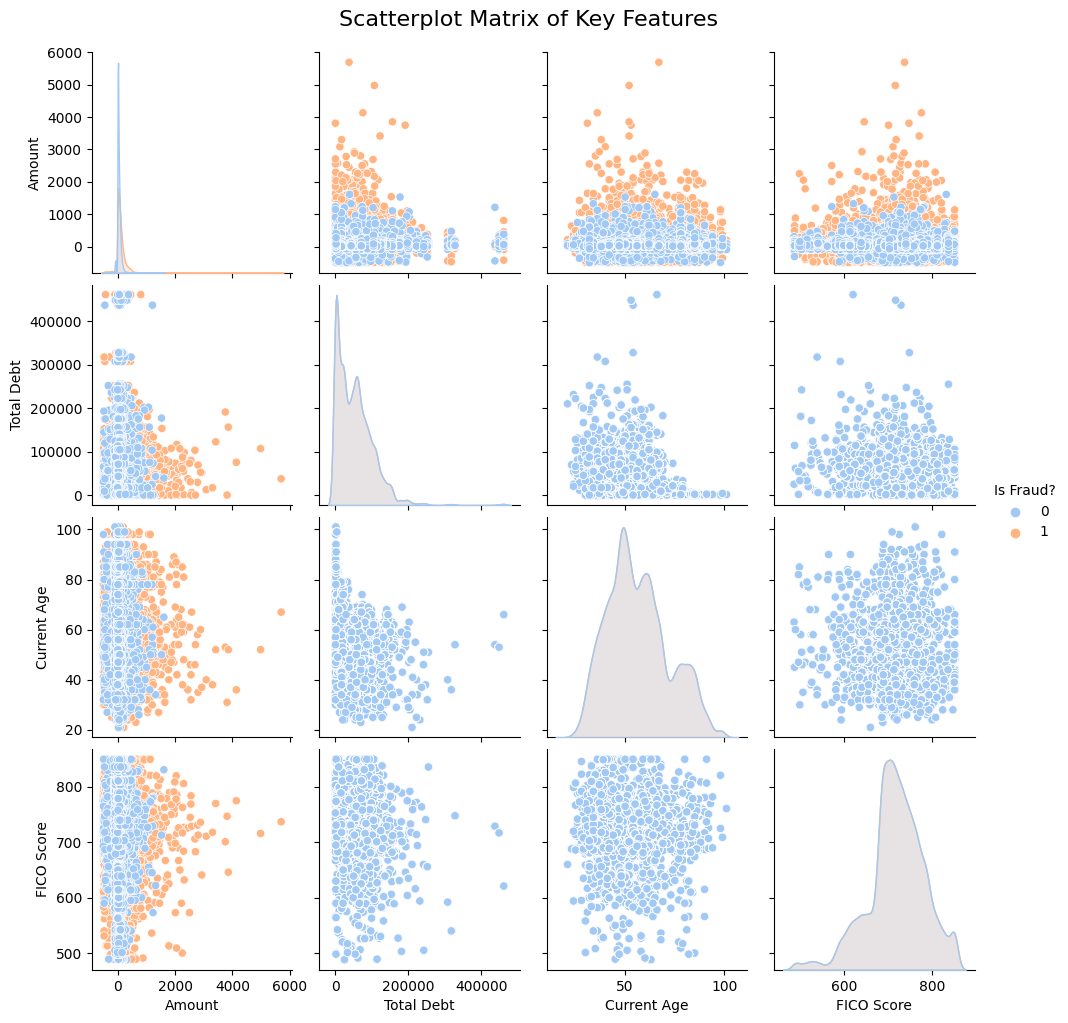

In [208]:
# Scatterplot matrix for important features
sns.pairplot(df_encoded, vars=['Amount', 'Total Debt', 'Current Age', 'FICO Score'], hue='Is Fraud?', palette='pastel')
plt.suptitle('Scatterplot Matrix of Key Features', y=1.02, fontsize=16)
plt.show()


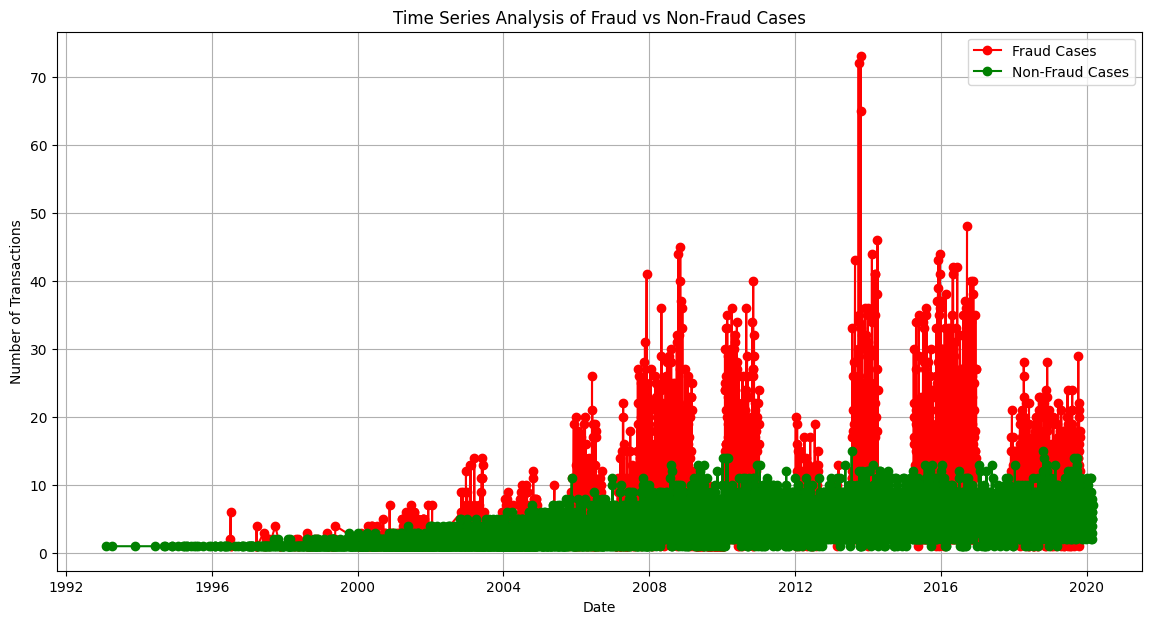

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Year', 'Month', 'Day', 'Time' columns exist and are numeric

# Creating a datetime feature for time series analysis
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Aggregating fraud cases over time
fraud_cases = df[df['Is Fraud?'] == 1].groupby('Date').size()
non_fraud_cases = df[df['Is Fraud?'] == 0].groupby('Date').size()

# Plotting the time series for both fraud and non-fraud cases
plt.figure(figsize=(14, 7))
plt.plot(fraud_cases.index, fraud_cases.values, label='Fraud Cases', color='red', marker='o')
plt.plot(non_fraud_cases.index, non_fraud_cases.values, label='Non-Fraud Cases', color='green', marker='o')
plt.title('Time Series Analysis of Fraud vs Non-Fraud Cases')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.show()


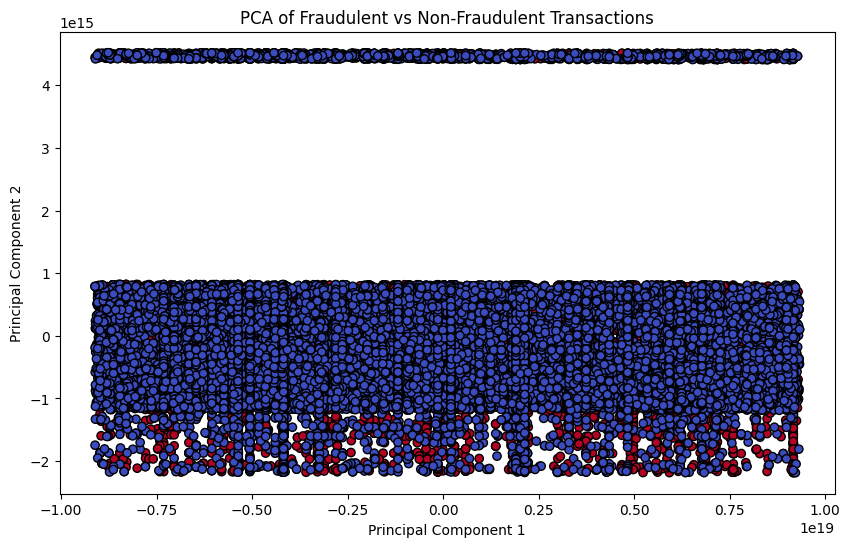

In [210]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Is Fraud?'], cmap='coolwarm', edgecolors='k')
plt.title('PCA of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
